<a href="https://colab.research.google.com/github/hafsakhaerunisa/ADM-Case-01-EDA-Group-B/blob/main/ADM_Case_01_EDA_Group_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h2><strong><font color="blue">Study Case 01 - Data Mining dan Business Intelligence: EDA pada data property</font></strong></h2></center>

<img alt="" src="https://github.com/taufiksutanto/ADM-Case-01-EDA/blob/main/images/Ray-pink-Property-Case-Banner.jpg?raw=1"/>

# Kasus:

* Anda adalah seorang Data Analyst yang bekerja di PT **Ray Pink Property Indonesia** (RPPI).
* RPPI adalah perusahaan property yang berdiri sejak 11 tahun yang lalu.
* RPPI memliki kantor cabang di 7 propinsi di Indonesia dan jumlahnya terus bertambah.
* Valuasi RPPI tahun ini mencapai Rp 7 Trilyun, meningkat 7% dari tahun sebelumnya.
* Bidang usaha RPPI adalah investasi dan jual-beli property secara umum, termasuk bekerja sama dengan developer perumahan.
* Data Engineer (DE)/Database Administrator (DBA) RPPI berhasil mengumpulkan data rumah-rumah yang dijual di beberapa kota di Indonesia.
* Sebagai Data Analyst anda akan hadir dan melakukan presentasi pada rapat direksi untuk memberikan insight dari data ke upper management (C-Level, senior managers, dan komisaris perusahaan).
* Di studi kasus ini anda mempersiapkan "bahan presentasi" dengan cara melakukan EDA pada data yang diterima dari DE/DBA.

## Petunjuk:

Di studi kasus pertama, anda mendapat bantuan keterangan dari manajemen. Setelah berdiskusi *over lunch* dengan beberapa manager senior, anda mendengar bahwa mereka ingin mengetahui:

1. Kualitas data yang dimiliki perusahaan.
2. Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi *data driven company* yang unggul.
3. Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?
4. Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data).
5. Rumah dengan karakteristik seperti apa yang paling banyak dijual?
6. Jika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok, apakah dari data anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan?
7. Dan yang terpenting, informasi berharga apa lagi yang bisa anda dapatkan dari data?

## Catatan:

* Anda diperbolehkan melakukan augmentasi data (menambah data eksternal).
* Yakinkan menuliskan asumsi anda atas kesimpulan dan rekomendasi yang diberikan ke perusahaan.
* Yakinkan kesimpulan dan rekomendasi ditujukan ke perusahaan (bukan dosen mata kuliah).
* Anda boleh menggunakan software visualisasi apapun, misal excel, Ms Word, Photoshop, dsb.
* Yakinkan file images dapat dibuka (nampak) saat ipynb di Jupyter notebook anda dibuka di Google Colab.
 - Tips: hati-hati dalam melakukan penamaan file, Google colab case sensitive.
* Interpretasi diberikan menggunakan cell markdown tepat dibawah output code yang relevan diatasnya.
* Anda tidak diperkenankan bertanya pertanyaan yang:
 - Merupakan jawaban atau menjurus ke jawaban studi kasus.
 - Debugging - code error (anda diharapkan melakukan code troubleshooting sendiri via mesin pencari)
* Pada studi kasus ini anda hanya diperkenankan untuk melakukan EDA (bukan modeling seperti prediksi/forecasting)

## Komponen Penilaian:

* Code tidak diubah sejak deadline studi kasus.
* Code dapat di "Run-All" di Google Colab oleh dosen tanpa error.
* Pemilihan preprocessing dan visualisasi yang tepat
* Interpretasi dan rekomendasi dengan narasi dan kualitas yang baik, serta berdasarkan atas (pengolahan) data.
* Kreativitas dan inovasi pengolahan data dan penyajian visualisasi.

# Kualitas data yang dimiliki perusahaan.

In [ ]:
# Loading Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msnum

In [ ]:
df_depok = pd.read_csv('https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/depok.csv',low_memory = False, encoding='utf8')
df_bogor = pd.read_csv('https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/bogor.csv',low_memory = False, encoding='utf8')
df_tangerang = pd.read_csv('https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/tangerang.csv',low_memory = False, encoding='utf8')
df_bekasi = pd.read_csv('https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/bekasi.csv',low_memory = False, encoding='utf8')

Sebelum melakukan analisis lanjutan, dilakukan drop kolom `Unnamed: 14`, `Unnamed: 15`, `Unnamed: 16`, `Unnamed: 17`, `Unnamed: 18`, `Unnamed: 19`, `Unnamed: 20`, `Unnamed: 21`, `Unnamed: 22`, `Unnamed: 23`, `Unnamed: 24`, `Unnamed: 25` karena kolom tersebut pada semua data tidak memiliki values sehingga tidak ada hal yang dapat disimpulkan dari kolom tersebut.

In [ ]:
# Drop colomnd as mentioned above
df_bogor = df_bogor[['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi','sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi']]
df_depok = df_depok[['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi','sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi']]
df_tangerang = df_tangerang[['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi','sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi']]
df_bekasi = df_bekasi[['created_at', 'LT', 'LB', 'KT', 'KM', 'garasi', 'carport', 'lokasi','sertifikat', 'listrik', 'hadap', 'harga', 'URL', 'deskripsi']]

Selanjutnya akan dilakukan penggabungan dari database rumah-rumah di Jakarta, Depok, Bogor, Tangerang, dan Bekasi ke dalam satu database.

In [ ]:
# Create new colomn `Kota` to identify the source for each database
df_bogor['Kota'] = ['Bogor' for i in range(df_bogor.shape[0])]
df_bekasi['Kota'] = ['Bekasi' for i in range(df_bekasi.shape[0])]
df_depok['Kota'] = ['Depok' for i in range(df_depok.shape[0])]
df_tangerang['Kota'] = ['Tangerang' for i in range(df_tangerang.shape[0])]

In [ ]:
# Joining databases 
df_full = pd.concat([df_bogor,df_bekasi,df_depok,df_tangerang], axis = 0, ignore_index = True)

## Missing Values

Note:
- Terdapat beberapa missing values pada kolom semua kolom.
- Untuk kolom `hadap` yang memiliki sekitar 94% missing values akan ditanganni dengan melakukan drop kolom.  Dengan lebih dari 90% data yang missing, akan sangat sulit untuk dilakukan interpretasi terhadap data dan kurang dapat menjelaskan populasi yang ada. Dengan demikian, kami merekomendasikan untuk melakukan dropping kolom.
- Untuk kolom `` yang mengalami missing values akan ditangani dengan melakukan drop baris karena proporsi data missing pada kolom tersebut kurang dari ...%


In [ ]:
# Amount of missing values for every colomn
df_full.isnull().sum()

created_at    2574
LT            2573
LB            2575
KT            2575
KM            2576
garasi        2828
carport       2657
lokasi        2575
sertifikat    2578
listrik       2609
hadap         2939
harga         2575
URL           2575
deskripsi     2575
Kota             0
dtype: int64

In [ ]:
# Proportion Missing Values for every colomn
df_full.isnull().sum()/df_full.shape[0]

created_at    0.825794
LT            0.825473
LB            0.826115
KT            0.826115
KM            0.826436
garasi        0.907283
carport       0.852422
lokasi        0.826115
sertifikat    0.827077
listrik       0.837023
hadap         0.942894
harga         0.826115
URL           0.826115
deskripsi     0.826115
Kota          0.000000
dtype: float64

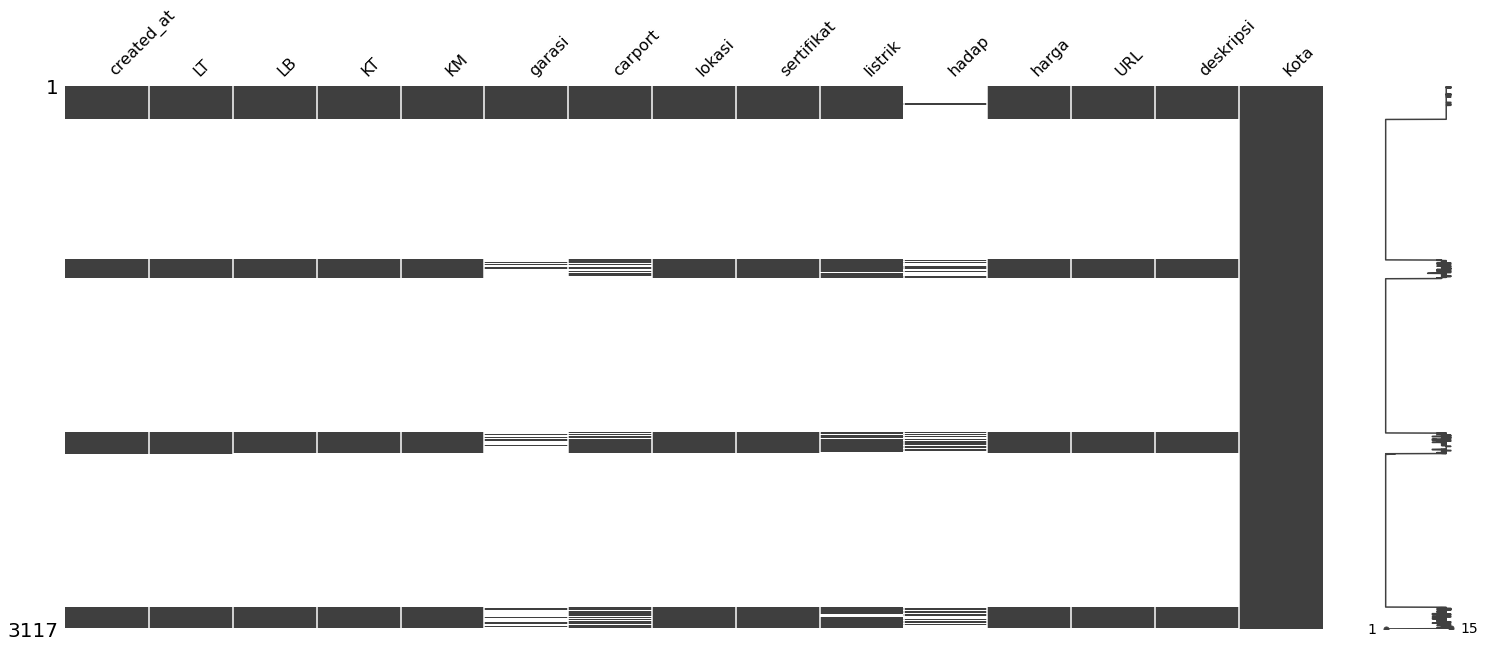

In [ ]:
msnum.matrix(df_full)

Pada heatmap dapat dilihat bahwa missing values tersebar pada beberapa kolom, namun kolom `hadap` memiliki proporsi missing values yang paling besar.

In [ ]:
# Drop rows from variable LT, LB, KT, KM, harga
df_full_non_null = df_full.dropna(subset  = ['LT','LB','KT','KM','harga'])

Untuk kolom `LT`, `LB`, `KT`, `KM`, dan `harga` yang mengalami missing values akan ditangani dengan melakukan drop baris karena proporsi data missing pada kolom tersebut kurang dari 90%.

In [ ]:
# Drop colomn hadap
df_full_non_null.drop(columns = 'hadap', inplace = True)

Untuk kolom `hadap` yang memiliki sekitar 94% missing values akan ditanganni dengan melakukan **drop kolom**.  Dengan lebih dari 90% data yang missing, akan sangat sulit untuk dilakukan interpretasi terhadap data dan kurang dapat menjelaskan populasi yang ada. Dengan demikian, kami merekomendasikan untuk melakukan dropping kolom.

In [ ]:
print(df_full_non_null.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 3112
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  541 non-null    object 
 1   LT          541 non-null    object 
 2   LB          541 non-null    float64
 3   KT          541 non-null    float64
 4   KM          541 non-null    float64
 5   garasi      288 non-null    float64
 6   carport     460 non-null    float64
 7   lokasi      541 non-null    object 
 8   sertifikat  539 non-null    object 
 9   listrik     508 non-null    float64
 10  harga       541 non-null    float64
 11  URL         541 non-null    object 
 12  deskripsi   541 non-null    object 
 13  Kota        541 non-null    object 
dtypes: float64(7), object(7)
memory usage: 63.4+ KB
None


In [ ]:
df_full_non_null.describe()

,LB,KT,KM,garasi,carport,listrik,harga
count,541.000000,541.000000,541.000000,288.000000,460.000000,508.000000,5.410000e+02
mean,122.092421,2.902033,2.062847,0.670139,1.404348,2498.818898,6.679639e+08
std,160.996212,1.098659,1.159393,1.180066,0.962014,3448.579530,1.437812e+09
min,15.000000,1.000000,1.000000,0.000000,0.000000,900.000000,4.100000e+01
25%,47.000000,2.000000,1.000000,0.000000,1.000000,1300.000000,1.490000e+03
50%,72.000000,3.000000,2.000000,0.000000,1.000000,2200.000000,2.700000e+08
75%,136.000000,3.000000,3.000000,1.000000,2.000000,2200.000000,8.250000e+08
max,2500.000000,8.000000,8.000000,10.000000,10.000000,66000.000000,1.650000e+10


In [ ]:
# Handling missing values using imputation
df_full_non_null['garasi'] = df_full_non_null['garasi'].fillna(np.round(np.mean(df_full_non_null['garasi'])))
df_full_non_null['carport'] = df_full_non_null['carport'].fillna(np.round(np.mean(df_full_non_null['carport'])))
df_full_non_null['listrik'] = df_full_non_null['listrik'].fillna(np.mean(df_full_non_null['listrik']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Untuk missing value pada kolom `garasi`, `carpot`, dan `listrik`, kami merekomendasikan untuk ditanganni dengan **melakukan imputasi menggunakan mean** karena distribusi dari setiap kolom tidak terlalu skewed (dilihat dari nilai mean yang mirip dengan nilai median).

## Checking Data Types

Note:
- Kolom `garasi`, `carport`, `KT`, `KM` diubah dari float menjadi integer karena jumlah kapasitas dari garasi, carport, kamar tidur, dan kamar mandi merupakan data diskrit (bilangan bulat).
- Kolom `LT` diubah dari tipe object menjadi float karena luas tanah merupakan data numerik dan bukan kategorik.
- Kolom `created_id` diubah dari object menjadi tipe data tanggal (datetime)
- Kolom `sertifikat` diubah dari object menjadi `category` 

In [ ]:
df_full_non_null['garasi'] = df_full_non_null['garasi'].astype('int64')
df_full_non_null['carport'] = df_full_non_null['carport'].astype('int64')
df_full_non_null['LT'] = df_full_non_null['LT'].astype('float64')
df_full_non_null['LB'] = df_full_non_null['LB'].astype('float64')
df_full_non_null['KT'] = df_full_non_null['KT'].astype('int64')
df_full_non_null['KM'] = df_full_non_null['KM'].astype('int64')
df_full_non_null['created_at'] = pd.to_datetime(df_full_non_null['created_at'], format = '%d-%m-%Y')
df_full_non_null['sertifikat'] = df_full_non_null['sertifikat'].astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
print(df_full_non_null.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 3112
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  541 non-null    datetime64[ns]
 1   LT          541 non-null    float64       
 2   LB          541 non-null    float64       
 3   KT          541 non-null    int64         
 4   KM          541 non-null    int64         
 5   garasi      541 non-null    int64         
 6   carport     541 non-null    int64         
 7   lokasi      541 non-null    object        
 8   sertifikat  539 non-null    category      
 9   listrik     541 non-null    float64       
 10  harga       541 non-null    float64       
 11  URL         541 non-null    object        
 12  deskripsi   541 non-null    object        
 13  Kota        541 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(4), int64(4), object(4)
memory usage: 59.9+ KB
None


In [ ]:
df_full_non_null.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Untuk kolom `sertifikat` akan dilakukan drop baris karena hanya terdapat 2 missing values

In [ ]:
print(df_full_non_null.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539 entries, 0 to 3112
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  539 non-null    datetime64[ns]
 1   LT          539 non-null    float64       
 2   LB          539 non-null    float64       
 3   KT          539 non-null    int64         
 4   KM          539 non-null    int64         
 5   garasi      539 non-null    int64         
 6   carport     539 non-null    int64         
 7   lokasi      539 non-null    object        
 8   sertifikat  539 non-null    category      
 9   listrik     539 non-null    float64       
 10  harga       539 non-null    float64       
 11  URL         539 non-null    object        
 12  deskripsi   539 non-null    object        
 13  Kota        539 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(4), int64(4), object(4)
memory usage: 59.7+ KB
None


## Duplicate Values

Note: Tidak terdapat duplicate values pada data

In [ ]:
print('Duplicated Values :')
print(df_full_non_null.duplicated().sum())

Duplicated Values :
0


# Checking Noise or Outlier

# Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi data driven company yang unggul.

In [ ]:
df_full_non_null['deskripsi']

0       Dekat tol jati warna, dekat sutle busway, deka...
1       Destinasi menarik di kawasan Babakan Madang; G...
2       Destinasi menarik di kawasan Babakan Madang; G...
3       Destinasi menarik di kawasan Babakan Madang; G...
4       Destinasi menarik di kawasan Babakan Madang; G...
                              ...                        
3108    Lokasi sangat dekat dengan berbagai Akses,Ters...
3109    Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr...
3110    1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,...
3111    Fasilitas Terdekat :Lokasi strategis, berada d...
3112    Akses Mudah: 10 Menit Ke stasiun kereta poris ...
Name: deskripsi, Length: 539, dtype: object

Untuk kolom `deskripsi` dapat dilakukan ekstraksi informasi di mana dilihat jarak dari masing-masing rumah ke tempat-tempat penting seperti rumah sakit, supermarket, sekolah, transportasi umum terdekat) sehingga pada data analisis selanjutnya dapat dipertimbangkan jarak dari properti yang dijual ke tempat-tempat tersebut.

In [ ]:
df_full_non_null[['LT','LB']]

,LT,LB
0,75.0,38.0
1,60.0,40.0
2,60.0,50.0
3,60.0,70.0
4,90.0,60.0
...,...,...
3108,60.0,55.0
3109,66.0,70.0
3110,202.0,85.0
3111,108.0,130.0


Kemudian, DE juga dapat menambahkan luas sisa tanah di setiap properti untuk nantinya pembeli dapat mempertimbangkan dalam pembuatan tanah atau lainnya.

# Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?

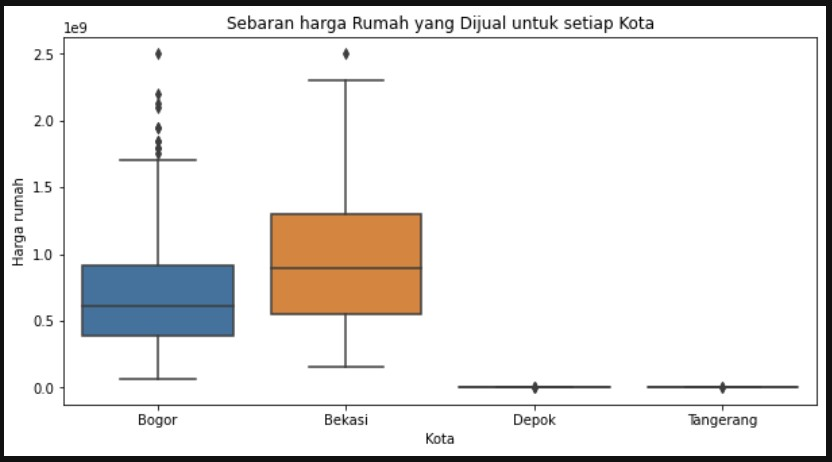

Karena terlihat terdapat kecenderungan perbedaan harga rumah di setiap kotanya, sehingga disarankan untuk RPPI supaya menginvestasikan rumah yang berada di kota bogor karena terlihat masih ada banyak rumah yang berharga murah tetapi memiliki potensi jual berharga tinggi.

Di Depok dan Tangerang memiliki harga rumah yang cenderung lebih rendah daripada Bogor dan Bekasi sehingga RPPI dapat merekomendasikan kepada customer untuk memmilih rumah di daerah Depok dan Tangerang, namun dalam hal ini harus dilakukan analisis lebih lanjut dari setiap rumah di daerah tersebut.

# Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data).

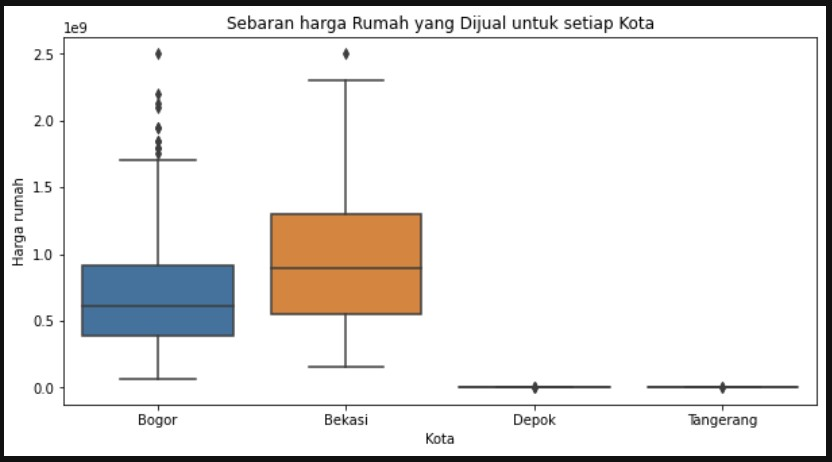

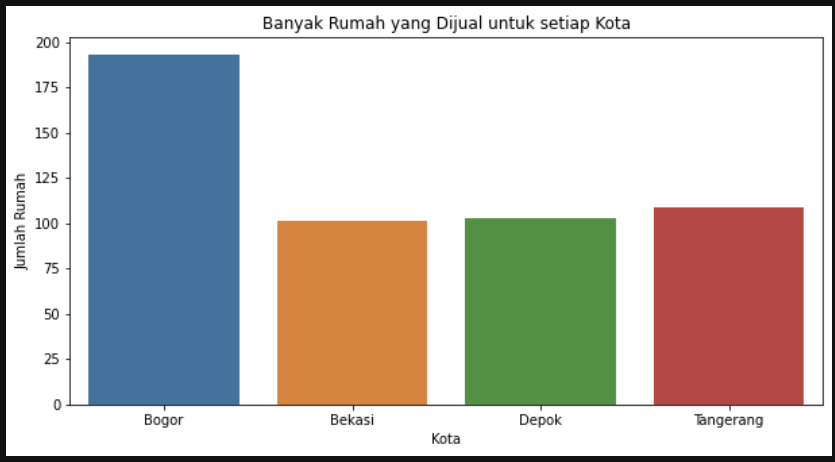

Terlihat dari visualisasi boxplot dan countplot, bahwa kota Bogor merupakan kota yang diminati dilihat dari banyaknya penjualan dan harga yang relatif terjangkau. Dengan demikian RPPI 

# Rumah dengan karakteristik seperti apa yang paling banyak dijual?

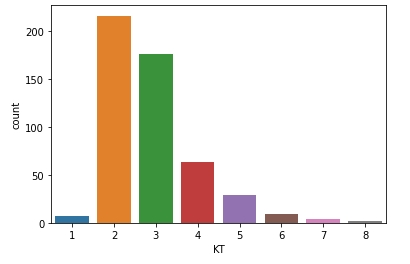

Berdasarkan jumlah kamar tidur, mayoritas bangunan yang dijual adalah bangunan atau dalam hal ini rumah dengan jumlah kamar tidur sebanyak 2 ruangan. Hal ini bisa terlihat dari visualisasi diatas dimana terdapat 200an lebih pilihan  rumah yang tersedia untuk jumlah kamar tidur sebanyak 2 ruang.

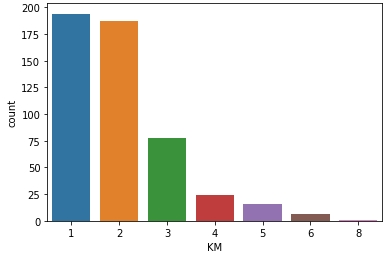

Berdasarkan jumlah kamar mandi, mayoritas bangunan yang dijual adalah bangunan atau dalam hal ini rumah dengan jumlah kamar mandi sebanyak 1 ruang saja. Hal ini bisa terlihat dari visualisasi diatas dimana pilihan rumah dengan jumlah kamar mandi 1 ruangan hampir menyentuh angka 200 rumah.

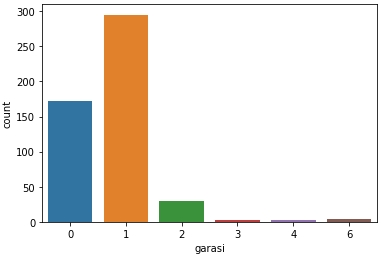

Berdasarkan jumlah garasi, mayoritas bangunan yang dijual adalah bangunan atau dalam hal ini rumah dengan jumlah garasi sebanyak 1 ruangan. Hal ini bisa terlihat dari visualisasi diatas dimana pilihan rumah dengan garasi sebanyak 1 ruang hampir menyentuh angka 300  pilihan  rumah. 

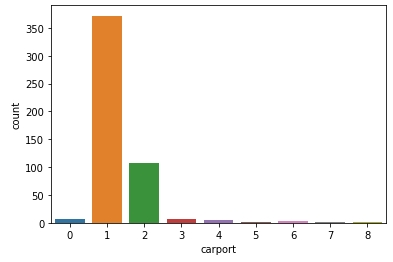

Berdasarkan jumlah carport, mayoritas bangunan yang dijual adalah bangunan atau dalam hal ini rumah dengan jumlah carport sebanyak 1 ruangan. Hal ini bisa terlihat dari visualisasi diatas dimana pilihan rumah dengan carport sebanyak 1 ruang diatas 350 pilihan  rumah.